In [1]:
pip install requests pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
import pandas as pd

# Base URL for CoinGecko API
BASE_URL = "https://api.coingecko.com/api/v3"

# Function to fetch historical market data
def fetch_historical_data(coin_id, vs_currency="usd", days="30"):
    endpoint = f"/coins/{coin_id}/market_chart"
    params = {
        "vs_currency": vs_currency,
        "days": days,
    }
    response = requests.get(BASE_URL + endpoint, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"API Error: {response.status_code}")

# Fetching Bitcoin historical data for the last 30 days
data = fetch_historical_data("bitcoin", days="30")

# Extracting prices and converting to DataFrame
prices = data['prices']
df = pd.DataFrame(prices, columns=["timestamp", "price"])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')  # Convert to readable datetime
print(df.head())


                timestamp         price
0 2024-11-10 05:11:29.313  79255.854033
1 2024-11-10 06:06:32.677  78952.161478
2 2024-11-10 07:17:14.206  79061.906989
3 2024-11-10 08:15:31.034  78987.448544
4 2024-11-10 09:05:40.902  79193.462441


Analyzing the Data

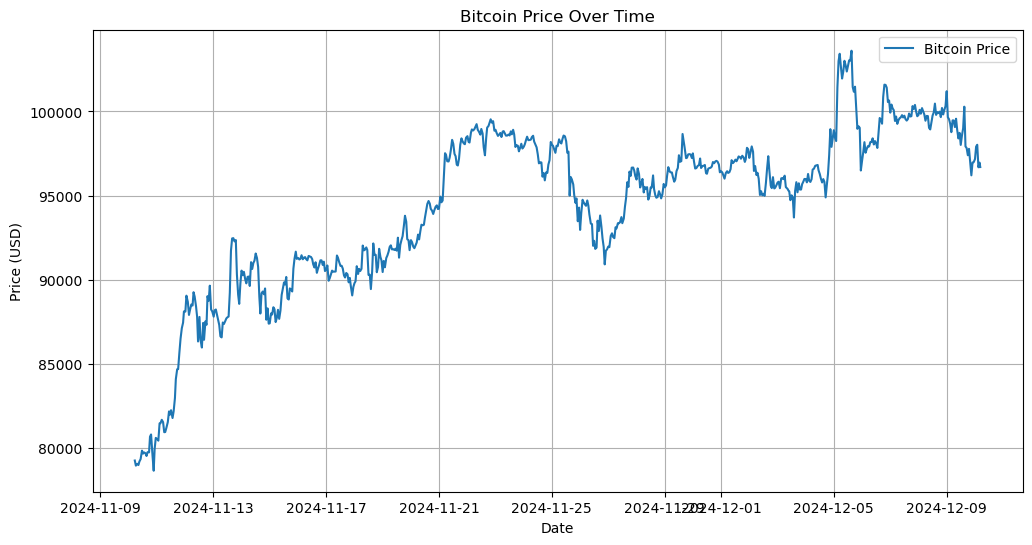

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], label="Bitcoin Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Over Time")
plt.legend()
plt.grid(True)
plt.show()


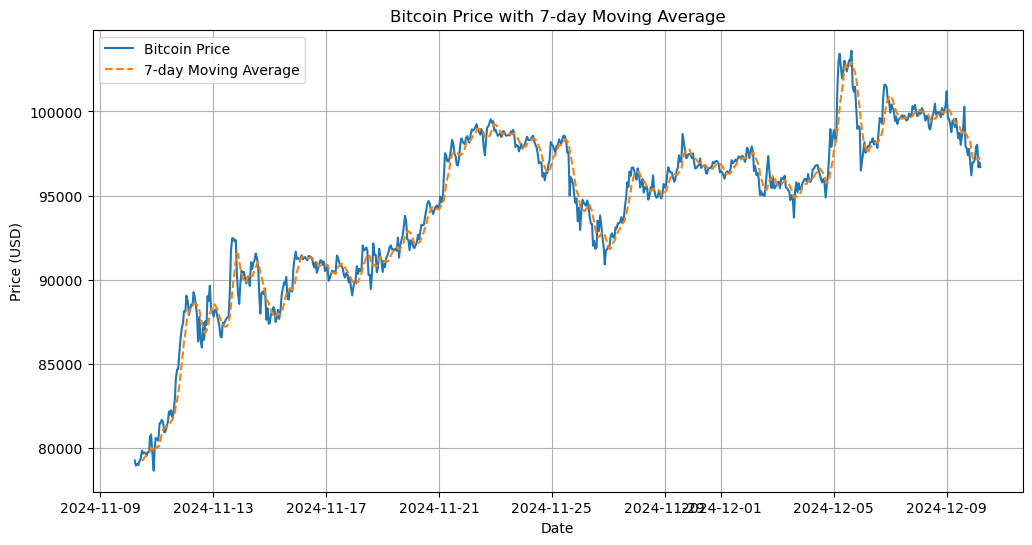

In [7]:
df['7-day MA'] = df['price'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], label="Bitcoin Price")
plt.plot(df['timestamp'], df['7-day MA'], label="7-day Moving Average", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price with 7-day Moving Average")
plt.legend()
plt.grid(True)
plt.show()


Volatility Analysis: Measuring daily price change percentage.

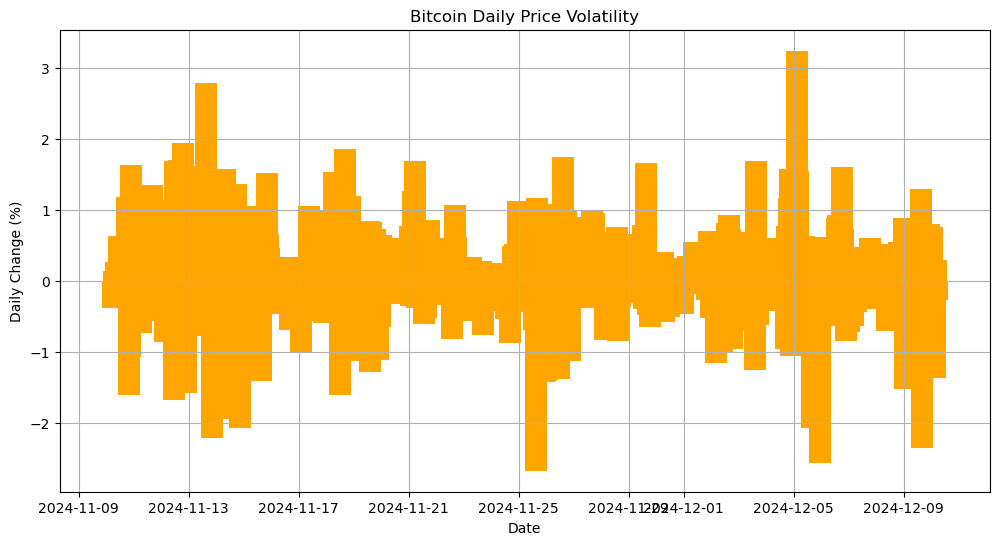

In [9]:
df['daily_change'] = df['price'].pct_change() * 100
plt.figure(figsize=(12, 6))
plt.bar(df['timestamp'], df['daily_change'], label="Daily Change (%)", color="orange")
plt.xlabel("Date")
plt.ylabel("Daily Change (%)")
plt.title("Bitcoin Daily Price Volatility")
plt.grid(True)
plt.show()


Comparing other cryptocurrencies by fetching and analyzing their data such as Bitcoin, Ethereum and Binancecoin

In [45]:
import requests

BASE_URL = "https://api.coingecko.com/api/v3"

def fetch_historical_data(coin_id, vs_currency="usd", days="30"):
    endpoint = f"/coins/{coin_id}/market_chart"
    params = {
        "vs_currency": vs_currency,
        "days": days,
    }
    response = requests.get(BASE_URL + endpoint, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data for {coin_id}: {response.status_code}")
        return None


In [47]:
coins = ["bitcoin", "ethereum", "binancecoin"]
all_data = {}

for coin in coins:
    all_data[coin] = fetch_historical_data(coin, days="30")
    print(f"Data fetched for {coin}: {all_data[coin]}")


Data fetched for bitcoin: {'prices': [[1731218792677, 78952.16147811974], [1731223034206, 79061.906989299], [1731226531034, 78987.4485440283], [1731229540902, 79193.46244050356], [1731233320179, 79341.49473899079], [1731237509714, 79844.24936422959], [1731240889310, 79668.02293949606], [1731244112874, 79737.13753283337], [1731248072496, 79687.47138685943], [1731251396125, 79525.63342469053], [1731254570940, 79753.65091497928], [1731259124704, 79737.65841837798], [1731262070260, 80672.70034022776], [1731265329113, 80804.32968627992], [1731269952878, 79499.77987503516], [1731273383636, 78649.59273844388], [1731276243680, 79931.957300912], [1731279745260, 80600.03416750283], [1731284475769, 80525.26287473195], [1731287615252, 80435.76087399015], [1731291383203, 81464.08366869198], [1731294240770, 81475.90641772648], [1731298096760, 81674.57955797578], [1731302129244, 81535.74228417478], [1731305650664, 80938.07137423645], [1731308683353, 80948.7190232381], [1731312144996, 81191.1157860565

In [51]:
import pandas as pd

for coin, data in all_data.items():
    if data is not None:
        df = pd.DataFrame(data['prices'], columns=["timestamp", f"{coin}_price"])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')  # Convert timestamp
        print(f"\n{coin.capitalize()} Data:")
        print(df.head())



Bitcoin Data:
                timestamp  bitcoin_price
0 2024-11-10 06:06:32.677   78952.161478
1 2024-11-10 07:17:14.206   79061.906989
2 2024-11-10 08:15:31.034   78987.448544
3 2024-11-10 09:05:40.902   79193.462441
4 2024-11-10 10:08:40.179   79341.494739

Ethereum Data:
                timestamp  ethereum_price
0 2024-11-10 05:08:27.086     3196.080124
1 2024-11-10 06:03:30.541     3185.824484
2 2024-11-10 07:16:56.522     3189.264104
3 2024-11-10 08:01:07.046     3188.233382
4 2024-11-10 09:05:04.281     3185.468599

Binancecoin Data:
                timestamp  binancecoin_price
0 2024-11-10 06:13:14.143         628.650484
1 2024-11-10 07:14:42.625         630.891347
2 2024-11-10 08:16:05.028         630.939766
3 2024-11-10 09:13:46.008         634.477802
4 2024-11-10 10:15:22.723         634.672795


In [49]:
merged_df = pd.concat(
    [pd.DataFrame(all_data[coin]['prices'], columns=["timestamp", coin]) for coin in coins],
    axis=1
)
corr_matrix = merged_df.corr()
print(corr_matrix)


             timestamp   bitcoin  timestamp  ethereum  timestamp  binancecoin
timestamp     1.000000  0.819145   1.000000  0.907873   1.000000     0.774671
bitcoin       0.819145  1.000000   0.819148  0.702576   0.819162     0.594318
timestamp     1.000000  0.819148   1.000000  0.907530   1.000000     0.774676
ethereum      0.907873  0.702576   0.907530  1.000000   0.907862     0.868513
timestamp     1.000000  0.819162   1.000000  0.907862   1.000000     0.774663
binancecoin   0.774671  0.594318   0.774676  0.868513   0.774663     1.000000


Creating a histogram to understand how prices are distributed over a period of time

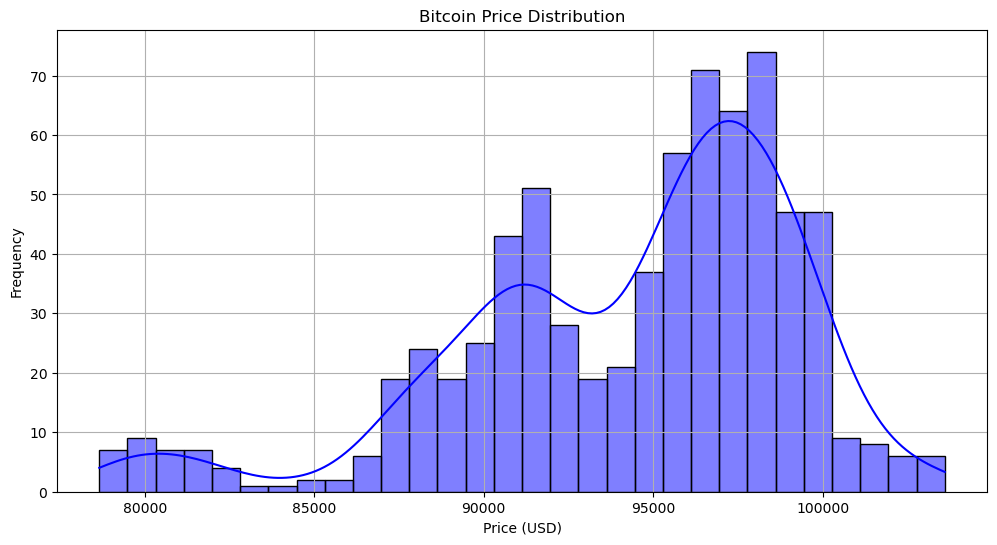

In [23]:
import seaborn as sns

# Price distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True, bins=30, color="blue")
plt.title("Bitcoin Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Identifying the days with the most price fluctuations

In [43]:
# Calculate absolute daily price changes
df['daily_change_abs'] = df['price'].diff().abs()

# Find top 5 days with highest price changes
top_volatility_days = df.nlargest(5, 'daily_change_abs')

print("Top 5 Most Volatile Days:")
print(top_volatility_days[['timestamp', 'daily_change_abs']])


Top 5 Most Volatile Days:
                  timestamp  daily_change_abs
597 2024-12-05 03:03:33.416       3182.986648
369 2024-11-25 15:13:39.605       2612.438717
617 2024-12-05 23:00:26.340       2538.255284
82  2024-11-13 15:01:17.584       2486.602766
706 2024-12-09 16:03:04.869       2359.596336


Calculating Rolling Volatility over a period of 7 days

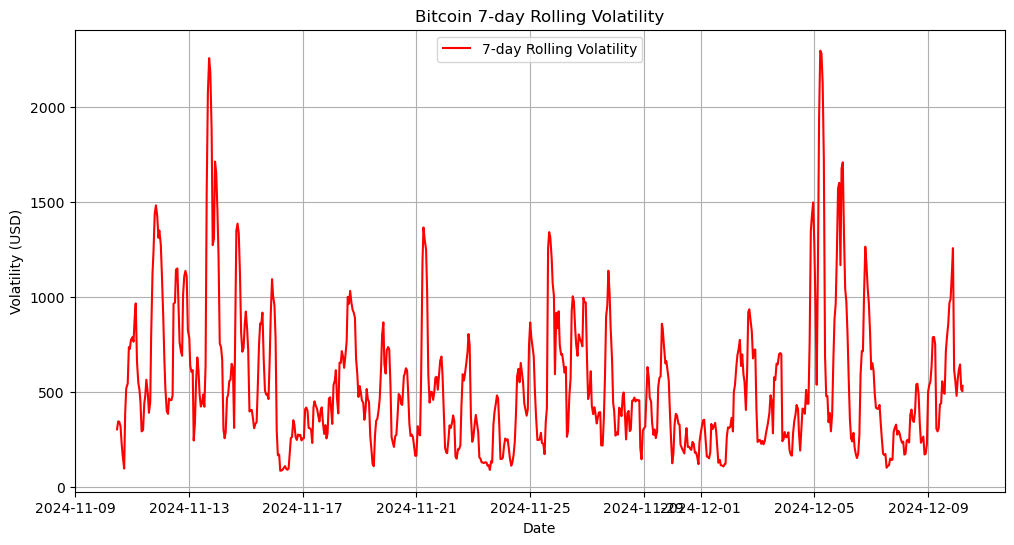

In [27]:
# Rolling standard deviation (volatility)
df['7-day Volatility'] = df['price'].rolling(window=7).std()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['7-day Volatility'], label="7-day Rolling Volatility", color="red")
plt.title("Bitcoin 7-day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (USD)")
plt.legend()
plt.grid(True)
plt.show()


Analyzing the relationship between the price and trading volume

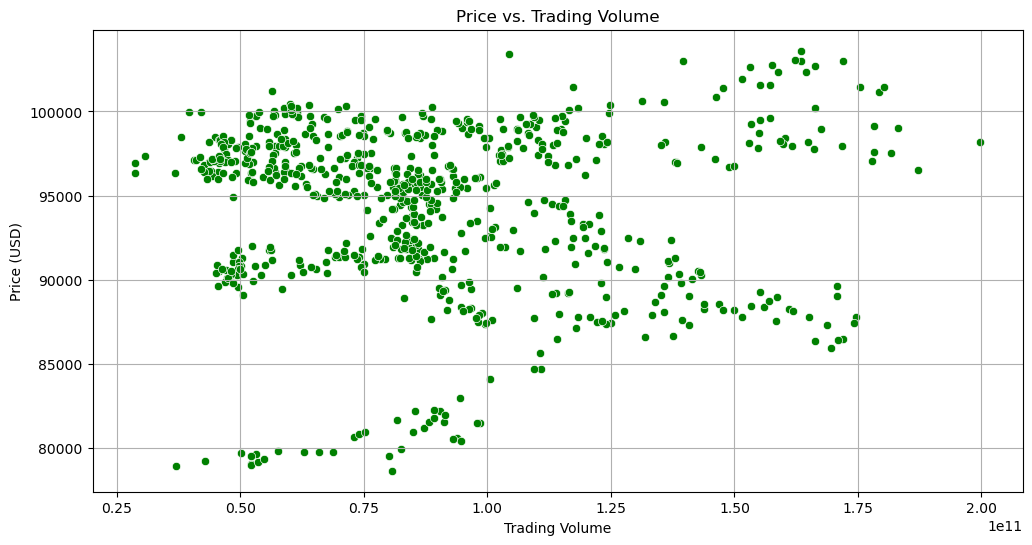

In [41]:
# Assuming 'volume' is part of the dataset
df['volume'] = [v[1] for v in data['total_volumes']]  # Extract volume from API response

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['volume'], y=df['price'], color="green")
plt.title("Price vs. Trading Volume")
plt.xlabel("Trading Volume")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()


Momentum Analysis- calculating the momentum indicator RSI (Relative Strength Index)

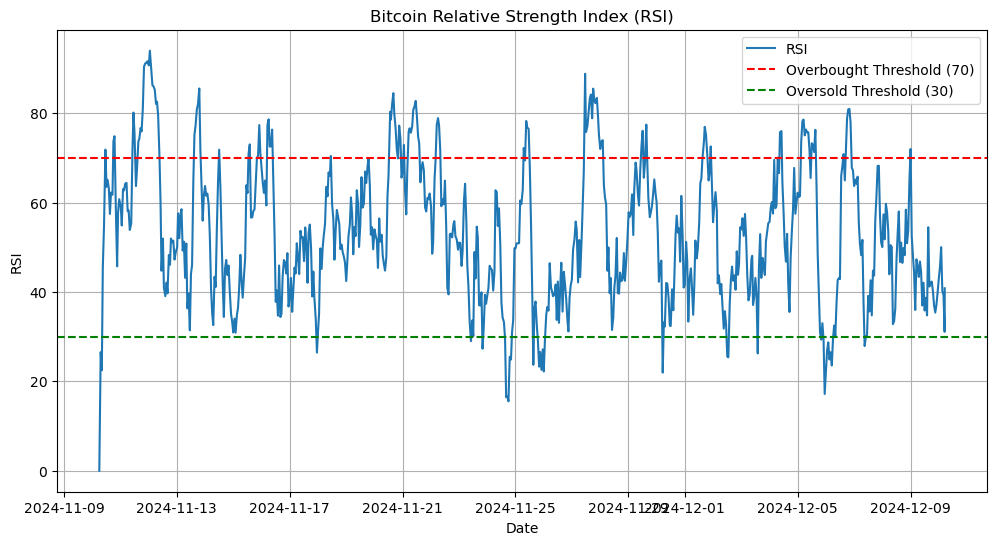

In [31]:
# Calculate price change
df['change'] = df['price'].diff()

# Calculate gain and loss
df['gain'] = df['change'].clip(lower=0)
df['loss'] = -df['change'].clip(upper=0)

# Calculate rolling averages of gain and loss
window = 14
df['avg_gain'] = df['gain'].rolling(window=window, min_periods=1).mean()
df['avg_loss'] = df['loss'].rolling(window=window, min_periods=1).mean()

# Calculate RSI
df['RSI'] = 100 - (100 / (1 + df['avg_gain'] / df['avg_loss']))

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['RSI'], label="RSI")
plt.axhline(70, color="red", linestyle="--", label="Overbought Threshold (70)")
plt.axhline(30, color="green", linestyle="--", label="Oversold Threshold (30)")
plt.title("Bitcoin Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.show()


Predicting Price using the Prophet time series forecast

In [35]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.1 MB/s eta 0:00:13
   ---------------------------------------- 0.1/13.3 MB 1.1 MB/s eta 0:00:13
   ---------------------------------------- 0.1/13.3 MB 901.1 kB/s eta 0:00:15
    --------------------------------------- 0.2/13.3 MB 1.1 MB/s eta 0:00:12
   - -------------------------------------- 0.3/13.3 MB 1.2 MB/s eta 0:00:11
   - -------------------------------------- 0.4/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.5/13.3 MB 1.5 MB/s eta 0:00:09
   - -------------------------------------- 0.6/13.3 MB 1.5 MB/s eta 0:00:09
   - -------------------------------------- 0.6/13.3 MB 1.2 MB/s eta 0:00:11
   -- ------------------------------------- 0.7/13.3 MB 1.3 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/13.3 MB 1.4 MB/s eta 0:00:10
   -- -----

10:51:45 - cmdstanpy - INFO - Chain [1] start processing
10:51:46 - cmdstanpy - INFO - Chain [1] done processing


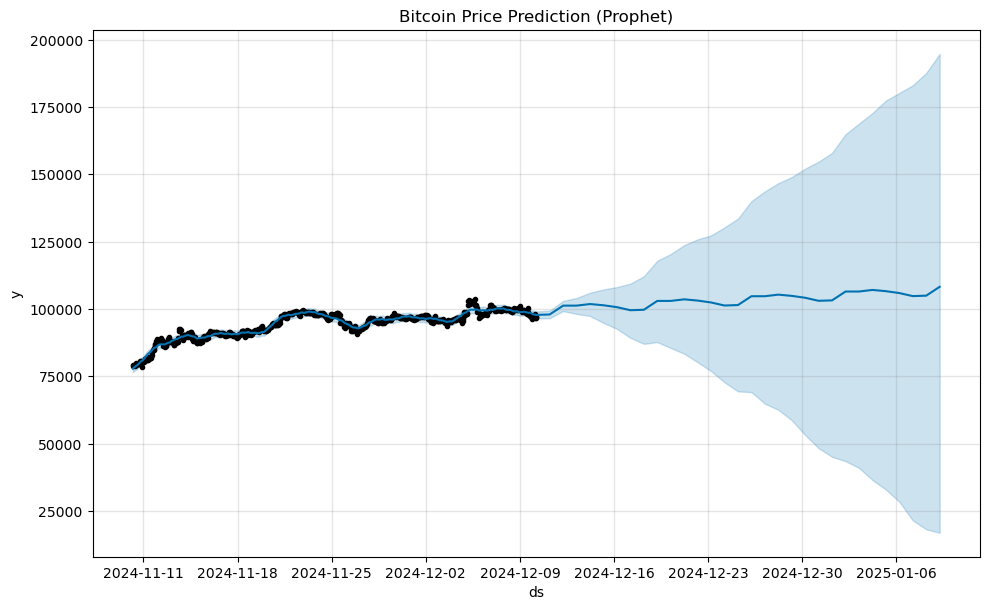

In [37]:
from prophet import Prophet

# Prepare data for Prophet
df_prophet = df[['timestamp', 'price']].rename(columns={"timestamp": "ds", "price": "y"})

# Create and fit model
model = Prophet()
model.fit(df_prophet)

# Make future predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot predictions
model.plot(forecast)
plt.title("Bitcoin Price Prediction (Prophet)")
plt.show()
